<a href="https://colab.research.google.com/github/leducthanhkim2004/aio2024/blob/main/HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://drive.google.com/file/d/1dSiUf-a7m34gUl3LLPmKDS6-v5sRBUZ0/view

--2024-10-13 13:47:05--  https://drive.google.com/file/d/1dSiUf-a7m34gUl3LLPmKDS6-v5sRBUZ0/view
Resolving drive.google.com (drive.google.com)... 142.251.2.100, 142.251.2.113, 142.251.2.101, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘view’

view                    [ <=>                ]  89.87K  --.-KB/s    in 0.04s   

2024-10-13 13:47:05 (2.46 MB/s) - ‘view’ saved [92024]



In [9]:
import numpy as np
import pandas as pd
import random
random.seed(0)
%matplotlib inline
import matplotlib.pyplot as plt
data =np.genfromtxt('advertising.csv',delimiter=',',skip_header =1 )
N = data . shape [0]
X=data[:, :3]
Y=data[:,3]


In [14]:
def mean_normalization(X):
  N=len(X)
  maxi= np.max(X)
  mini= np.min(X)
  avg =np.mean(X)
  X   = (X-avg)/(maxi-mini)
  X_b = np . c_ [ np . ones (( N , 1) ) , X ]
  return X_b, maxi,mini,avg
X_b, maxi,mini,avg =  mean_normalization(X)

In [21]:
def stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.00001):
    N = len(y)  # number of samples
    thetas = np.random.randn(X_b.shape[1], 1)  # Initialize random weights (thetas)
    thetas_path = [thetas.copy()]  # to track thetas over time
    losses = []  # to track loss over time

    for epoch in range(n_epochs):
        for i in range(N):
            # For a real-world application, you'd use a random index:
            random_index = i  # deterministic order for this assignment

            # Select the sample
            xi = X_b[random_index:random_index + 1]  # select i-th row from X_b
            yi = y[random_index:random_index + 1]    # select i-th target value

            # Step 1: Compute output (prediction) using current thetas
            y_hat = np.dot(xi, thetas)

            # Step 2: Compute the loss (Mean Squared Error)
            loss = (y_hat - yi)**2 / 2
            losses.append(loss[0][0])  # store scalar loss

            # Step 3: Compute gradient for the loss with respect to thetas
            gradients = xi.T.dot(y_hat - yi)  # gradient of loss w.r.t. thetas

            # Step 4: Update thetas (weights) using the computed gradients
            thetas -= learning_rate * gradients  # update thetas

            # Step 5: Log the updated thetas
            thetas_path.append(thetas.copy())

    return thetas_path, losses


In [24]:
sgd_theta , losses = stochastic_gradient_descent ( X_b , Y, n_epochs =1 , learning_rate
=0.01 )
print ( np .sum( losses ) )

7559.146705176404


In [18]:
X_b.shape

(200, 4)

<function matplotlib.pyplot.show(close=None, block=None)>

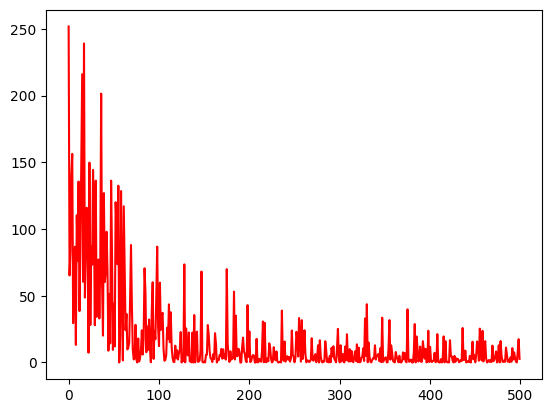

In [22]:
sgd_theta , losses = stochastic_gradient_descent (X_b,Y,n_epochs =50 ,
learning_rate =0.01 )

x_axis = list ( range (500) )
plt . plot ( x_axis , losses [:500] , color ="r")
plt . show

In [49]:
import numpy as np

def mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01):
    N = len(y)  # number of samples

    # Initialize thetas (weights) as provided in the document
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])

    thetas_path = [thetas.copy()]  # to track thetas over time
    losses = []  # to track loss over time

    for epoch in range(n_epochs):
        # Shuffle the data indices
        shuffled_indices = np.random.permutation(N)
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        # Process mini-batches
        for i in range(0, N, minibatch_size):
            # Select the mini-batch
            xi = X_b_shuffled[i:i + minibatch_size]  # mini-batch of features
            yi = y_shuffled[i:i + minibatch_size]    # mini-batch of target values

            # Step 1: Compute output (prediction)
            y_hat = np.dot(xi, thetas)

            # Step 2: Compute the loss (Mean Squared Error)
            loss = (y_hat - yi) ** 2 / 2
            loss_mean = np.mean(loss)  # Mean loss for the batch
            losses.append(loss_mean)  # Log the loss

            # Step 3: Compute gradient for the loss with respect to thetas
            gradients = (1 / minibatch_size) * xi.T.dot(y_hat - yi)

            # Step 4: Ensure that the gradients have the correct shape (4, 1)
            gradients = np.mean(gradients, axis=1).reshape(-1, 1)

            # Step 5: Update thetas (weights) using the computed gradients
            thetas -= learning_rate * gradients

        # Log the updated thetas after each epoch
        thetas_path.append(thetas.copy())

    return thetas_path, losses


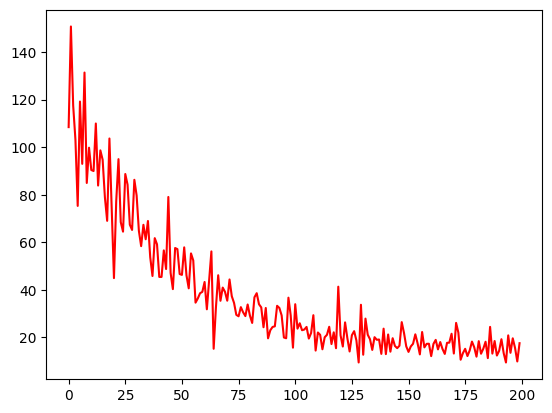

In [50]:
mbgd_thetas , losses = mini_batch_gradient_descent ( X_b , Y , n_epochs =50 , minibatch_size = 20 , learning_rate =0.01)

x_axis = list ( range (200) )
plt . plot ( x_axis , losses [:200] , color ="r")
plt . show ()

In [52]:
mbgd_thetas , losses = mini_batch_gradient_descent ( X_b , Y , n_epochs =50 ,
minibatch_size = 20 , learning_rate =0.01)
print ( round ( sum( losses ) ,2) )

11704.28


In [56]:
import numpy as np

def batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01):
    # Initialize thetas (weights)
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])

    thetas_path = [thetas.copy()]  # to track thetas over time
    losses = []  # to track loss over time
    N = len(y)  # number of samples

    for i in range(n_epochs):
        # Step 1: Compute output (prediction)
        y_hat = np.dot(X_b, thetas)  # X_b is the full dataset, batch processing

        # Step 2: Compute loss (Mean Squared Error)
        loss = (y_hat - y) ** 2 / 2  # element-wise squared difference
        mean_loss = np.mean(loss)  # Mean loss for the full dataset
        losses.append(mean_loss)

        # Step 3: Compute gradient for the loss with respect to thetas
        gradients = (1 / N) * X_b.T.dot(y_hat - y)  # Average gradient over all samples
        gradients = np.mean(gradients, axis=1).reshape(-1, 1)
        # Step 4: Update thetas (weights) using the computed gradients
        thetas -= learning_rate * gradients

        # Log the updated thetas after each epoch
        thetas_path.append(thetas.copy())

    return thetas_path, losses


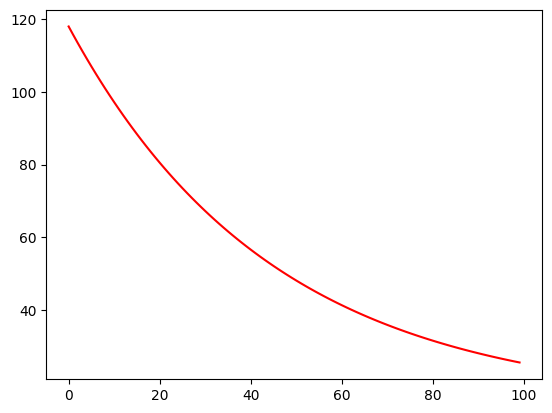

In [59]:
bgd_thetas , losses = batch_gradient_descent ( X_b , Y , n_epochs =100 , learning_rate
=0.01)

x_axis = list ( range (100) )
plt . plot ( x_axis , losses [:100] , color ="r")
plt . show ()

In [61]:
bgd_thetas , losses = batch_gradient_descent ( X_b , Y , n_epochs =100 , learning_rate
=0.01)
print ( round ( sum( losses ) ,2) )

5604.36
